# Projeto Aprendizado de Máquina

Aluno: Pedro Henrique Ramos Lauton<br>
Protocolo: GU3046222<br>
Professor: Rodrigo Campos Bortoletto

# Importação dos dados

Abaixo segue os passos utilizados para o processamento e recorte da base de dados

In [5]:
#Bibliotecas iniciais 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Importação dos dados
df_HY_VEE = pd.read_csv('Iowa_liquor_Sales_2633.csv')
df_HY_VEE.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S04134900053,02/16/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,34433,GREY GOOSE VODKA,12,750,17.97,26.96,12,323.52,9.0,2.38
1,S13981300106,08/19/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,53368,ST. CHARLES BRANDY,6,1750,10.53,15.79,6,94.74,10.5,2.77
2,S21192300100,09/15/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,52319,CHRISTIAN BROS BRANDY-ROUND,12,1000,7.11,10.67,12,128.04,12.0,3.17
3,S12271500059,05/16/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,37417,POPOV VODKA 80 PRF,12,1000,5.50,8.25,24,198.00,24.0,6.34
4,S19505800055,06/11/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73517,DEKUYPER CACTUS JUICE,12,1000,7.62,11.43,1,11.43,1.0,0.26


# Análise inicial dos dados

Abaixo segue a análise exploratória inicial dos dados, visualizando informações gerais sobre o DataFRame

In [6]:
#Informações dos dados
df_HY_VEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249567 entries, 0 to 249566
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    249567 non-null  object 
 1   Date                   249567 non-null  object 
 2   Store Number           249567 non-null  int64  
 3   Store Name             249567 non-null  object 
 4   Address                249567 non-null  object 
 5   City                   249567 non-null  object 
 6   Zip Code               249567 non-null  float64
 7   Store Location         249567 non-null  object 
 8   County Number          201651 non-null  float64
 9   County                 249567 non-null  object 
 10  Category               249382 non-null  float64
 11  Category Name          248926 non-null  object 
 12  Vendor Number          249566 non-null  float64
 13  Vendor Name            249566 non-null  object 
 14  Item Number            249567 non-nu

In [7]:
#Descrição dos dados
df_HY_VEE.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,249567.0,249567.0,201651.0,2.493820e+05,249566.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000,249567.000000
mean,2633.0,50320.0,77.0,1.050683e+06,271.391311,64882.171333,10.626581,911.836994,13.172141,19.767437,33.140856,571.743146,31.679946,8.367273
std,0.0,0.0,0.0,7.728070e+04,158.833226,113929.462531,2.606953,244.364251,20.827752,31.240757,147.006022,2740.191654,146.759561,38.769715
min,2633.0,50320.0,77.0,1.011000e+06,10.000000,122.000000,1.000000,0.000000,0.000000,0.000000,-648.000000,-4801.680000,-648.000000,-171.180000
25%,2633.0,50320.0,77.0,1.022100e+06,85.000000,33818.000000,12.000000,750.000000,7.470000,11.210000,6.000000,112.500000,9.000000,2.370000
50%,2633.0,50320.0,77.0,1.032200e+06,260.000000,43337.000000,12.000000,1000.000000,10.490000,15.740000,12.000000,189.000000,12.000000,3.170000
75%,2633.0,50320.0,77.0,1.081030e+06,395.000000,77487.000000,12.000000,1000.000000,16.490000,24.740000,24.000000,378.000000,24.000000,6.340000
max,2633.0,50320.0,77.0,1.901200e+06,987.000000,999280.000000,48.000000,3500.000000,2298.840000,3448.260000,15000.000000,260832.000000,15000.000000,3962.580000


# Pré-processamento

Os passos a seguir visam pré-processar a base, removendo dados nulos, renomeando atributos removendo colunas indesejadas e removendo outliers

In [9]:
#Verificação de nulos
df_HY_VEE.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                      0
City                         0
Zip Code                     0
Store Location               0
County Number            47916
County                       0
Category                   185
Category Name              641
Vendor Number                1
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [10]:
#Os dados faltantes em 'County Number' podem ser populados com o número do condado da loja, já que a base compreender apenas uma loja. 
df_HY_VEE['County Number'].value_counts()

County Number
77.0    201651
Name: count, dtype: int64

In [9]:
#Populando os dados com o número do condado e removendo as linhas faltantes
df_HY_VEE['County Number'] = df_HY_VEE['County Number'].fillna(77.0)
df_HY_VEE = df_HY_VEE.dropna()

In [12]:
#Verificação de nulos
df_HY_VEE.isnull().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [13]:
#Verificação de dados duplicados
df_HY_VEE.duplicated().sum()

0

In [11]:
#Foi identificado empiricamente que o DF continha dados negativos no valor de compra. Para arrumar isso, somente os valores de vendas positivos serão considerados
df_HY_VEE = df_HY_VEE[(df_HY_VEE['Sale (Dollars)'] > 0)]

In [18]:
#Renomeando as colunas do DF
novas_colunas= ['Invoice/ItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address', 'City', 
                'ZipCode', 'StoreLocation', 'CountyNumber', 'County', 'Category', 'CategoryName', 
                'VendorNumber', 'VendorName', 'ItemNumber', 'ItemDescription', 'Pack', 'BottleVolume_ml',
                'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']

df_HY_VEE.columns = novas_colunas
df_HY_VEE

,Invoice/ItemNumber,Date,StoreNumber,StoreName,Address,City,ZipCode,StoreLocation,CountyNumber,County,...,ItemNumber,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons
0,S04134900053,02/16/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,34433,GREY GOOSE VODKA,12,750,17.97,26.96,12,323.52,9.0,2.38
1,S13981300106,08/19/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,53368,ST. CHARLES BRANDY,6,1750,10.53,15.79,6,94.74,10.5,2.77
2,S21192300100,09/15/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,52319,CHRISTIAN BROS BRANDY-ROUND,12,1000,7.11,10.67,12,128.04,12.0,3.17
3,S12271500059,05/16/2013,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,37417,POPOV VODKA 80 PRF,12,1000,5.50,8.25,24,198.00,24.0,6.34
4,S19505800055,06/11/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73517,DEKUYPER CACTUS JUICE,12,1000,7.62,11.43,1,11.43,1.0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249562,S07597500002,09/06/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,11298,CROWN ROYAL CANADIAN WHISKY,6,1750,31.00,46.49,6,278.94,10.5,2.77
249563,S22152300095,11/03/2014,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,43137,BACARDI LIMON,12,1000,10.50,15.75,24,378.00,24.0,6.34
249564,S25253000009,04/23/2015,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,73526,DEKUYPER MELON LIQUEUR,12,750,6.30,9.45,12,113.40,9.0,2.38
249565,S06445900127,07/06/2012,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,82607,DEKUYPER SOUR APPLE,12,1000,7.35,11.02,36,396.72,36.0,9.51


In [20]:
#Remoção dos atributos estáticos. Retirei esse atributos por apresentarem uma constante para todos os dados, não revelando percepções interresantes. 
df_HY_VEE = df_HY_VEE.drop(columns=(['Invoice/ItemNumber', 'Date', 'StoreNumber', 'StoreName', 'Address', 'City', 'ZipCode', 'StoreLocation', 'CountyNumber', 'County', 'Category', 'VendorNumber', 'ItemNumber']))
df_HY_VEE

,CategoryName,VendorName,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons
0,IMPORTED VODKAS,"BACARDI U.S.A., INC.",GREY GOOSE VODKA,12,750,17.97,26.96,12,323.52,9.0,2.38
1,AMERICAN GRAPE BRANDIES,JIM BEAM BRANDS,ST. CHARLES BRANDY,6,1750,10.53,15.79,6,94.74,10.5,2.77
2,AMERICAN GRAPE BRANDIES,HEAVEN HILL BRANDS,CHRISTIAN BROS BRANDY-ROUND,12,1000,7.11,10.67,12,128.04,12.0,3.17
3,VODKA 80 PROOF,DIAGEO AMERICAS,POPOV VODKA 80 PRF,12,1000,5.50,8.25,24,198.00,24.0,6.34
4,MISCELLANEOUS SCHNAPPS,JIM BEAM BRANDS,DEKUYPER CACTUS JUICE,12,1000,7.62,11.43,1,11.43,1.0,0.26
...,...,...,...,...,...,...,...,...,...,...,...
249562,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL CANADIAN WHISKY,6,1750,31.00,46.49,6,278.94,10.5,2.77
249563,FLAVORED RUM,"BACARDI U.S.A., INC.",BACARDI LIMON,12,1000,10.50,15.75,24,378.00,24.0,6.34
249564,MISC. AMERICAN CORDIALS & LIQUEURS,JIM BEAM BRANDS,DEKUYPER MELON LIQUEUR,12,750,6.30,9.45,12,113.40,9.0,2.38
249565,APPLE SCHNAPPS,JIM BEAM BRANDS,DEKUYPER SOUR APPLE,12,1000,7.35,11.02,36,396.72,36.0,9.51


In [17]:
df_HY_VEE['Pack'].value_counts()

Pack
12    191803
6      54931
3        727
1        376
10       289
24       154
4        137
5        112
20        80
8         48
9         30
48        17
2          3
15         1
44         1
Name: count, dtype: int64

In [18]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['VendorName'].value_counts()

VendorName
DIAGEO AMERICAS                                          42137
JIM BEAM BRANDS                                          33143
LUXCO INC                                                13981
SAZERAC COMPANY  INC                                     11404
BACARDI USA INC                                           9810
                                                         ...  
HILLROCK ESTATE DISTILLERY                                   1
BOTTLE TREE BEVERAGE COMPANY LLC / CATHEAD DISTILLERY        1
STILLWORKS LLC                                               1
PARK STREET IMPORTS-PHILADELPHIA DIS                         1
PARK STREET IMPORTS-SWEET REVENGE                            1
Name: count, Length: 326, dtype: int64

In [19]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['ItemDescription'].value_counts()

ItemDescription
BLACK VELVET                               1585
HAWKEYE VODKA                              1460
JIM BEAM                                   1406
JAGERMEISTER LIQUEUR                       1399
PARAMOUNT WHITE RUM                        1378
                                           ... 
PENNSYLVANIA DUTCH STRAWBERRIES & CREAM       1
SOOH ZU BISON GRASS VODKA                     1
DEVILS RIVER COFFEE BOURBON                   1
SIR WINSTON APPLE                             1
FORTY CREEK DOUBLE BARREL HA                  1
Name: count, Length: 4351, dtype: int64

In [20]:
#Visualizando a quantidade total de classes nos atributos categóricos
df_HY_VEE['CategoryName'].value_counts()

CategoryName
AMERICAN FLAVORED VODKA      16193
STRAIGHT BOURBON WHISKIES    15303
100% AGAVE TEQUILA           12123
IMPORTED FLAVORED VODKA      10965
CANADIAN WHISKIES             9832
                             ...  
OTHER PROOF VODKA                6
FLAVORED GINS                    6
JAPANESE WHISKY                  3
IOWA DISTILLERY WHISKIES         1
AMERICAN WHISKIES                1
Name: count, Length: 96, dtype: int64

### Observação

As variáveis categóricas não apresentam uma relação ordianal entre elas, portanto, o ideal é utilizar a técnica de One-Hot Encoding. Porém, devido a baixa capacidade de processamento do meu computador, não é possível utilizar esse técnica, visto que teria mais de 4 mil atributos e constantemente o Jupyter acusa erro de memória. Portanto, será utilizado a técnica de LabelEncoder.

In [22]:
#Aplicando o LabelEncoder nos atributos categóricos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_HY_VEE['CategoryName'] = le.fit_transform(df_HY_VEE['CategoryName'])
df_HY_VEE['VendorName'] = le.fit_transform(df_HY_VEE['VendorName'])
df_HY_VEE['ItemDescription'] = le.fit_transform(df_HY_VEE['ItemDescription'])

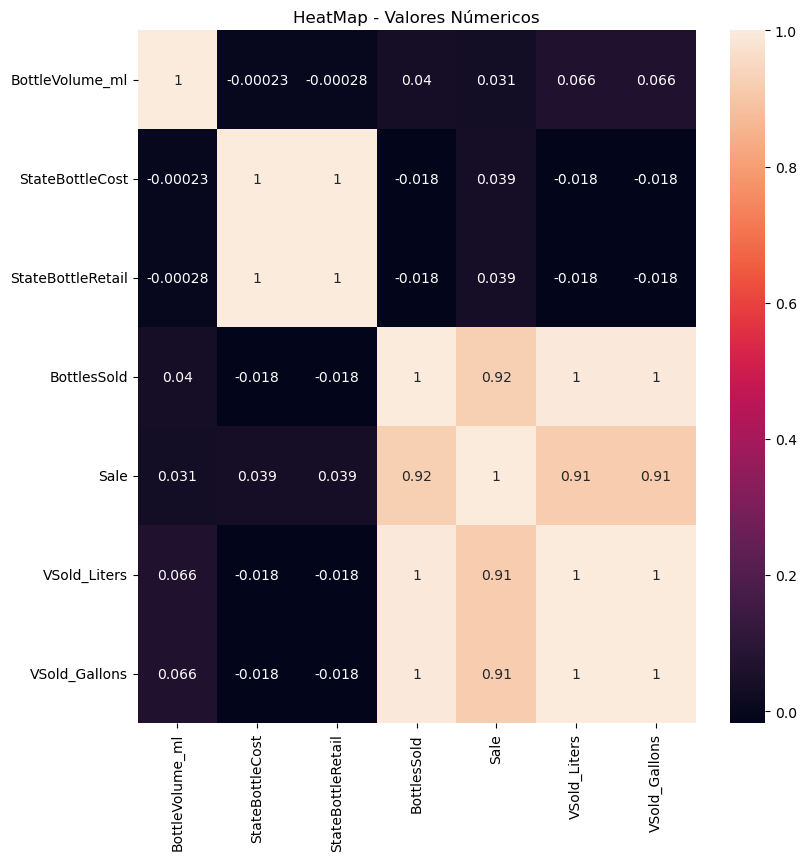

In [23]:
#Realizando o Heatmap para observar a correlação entre os atributos
plt.figure(figsize=(9,9))
plt.title("HeatMap - Valores Númericos")
sns.heatmap(df_HY_VEE[['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']].corr(), annot=True)
plt.show()

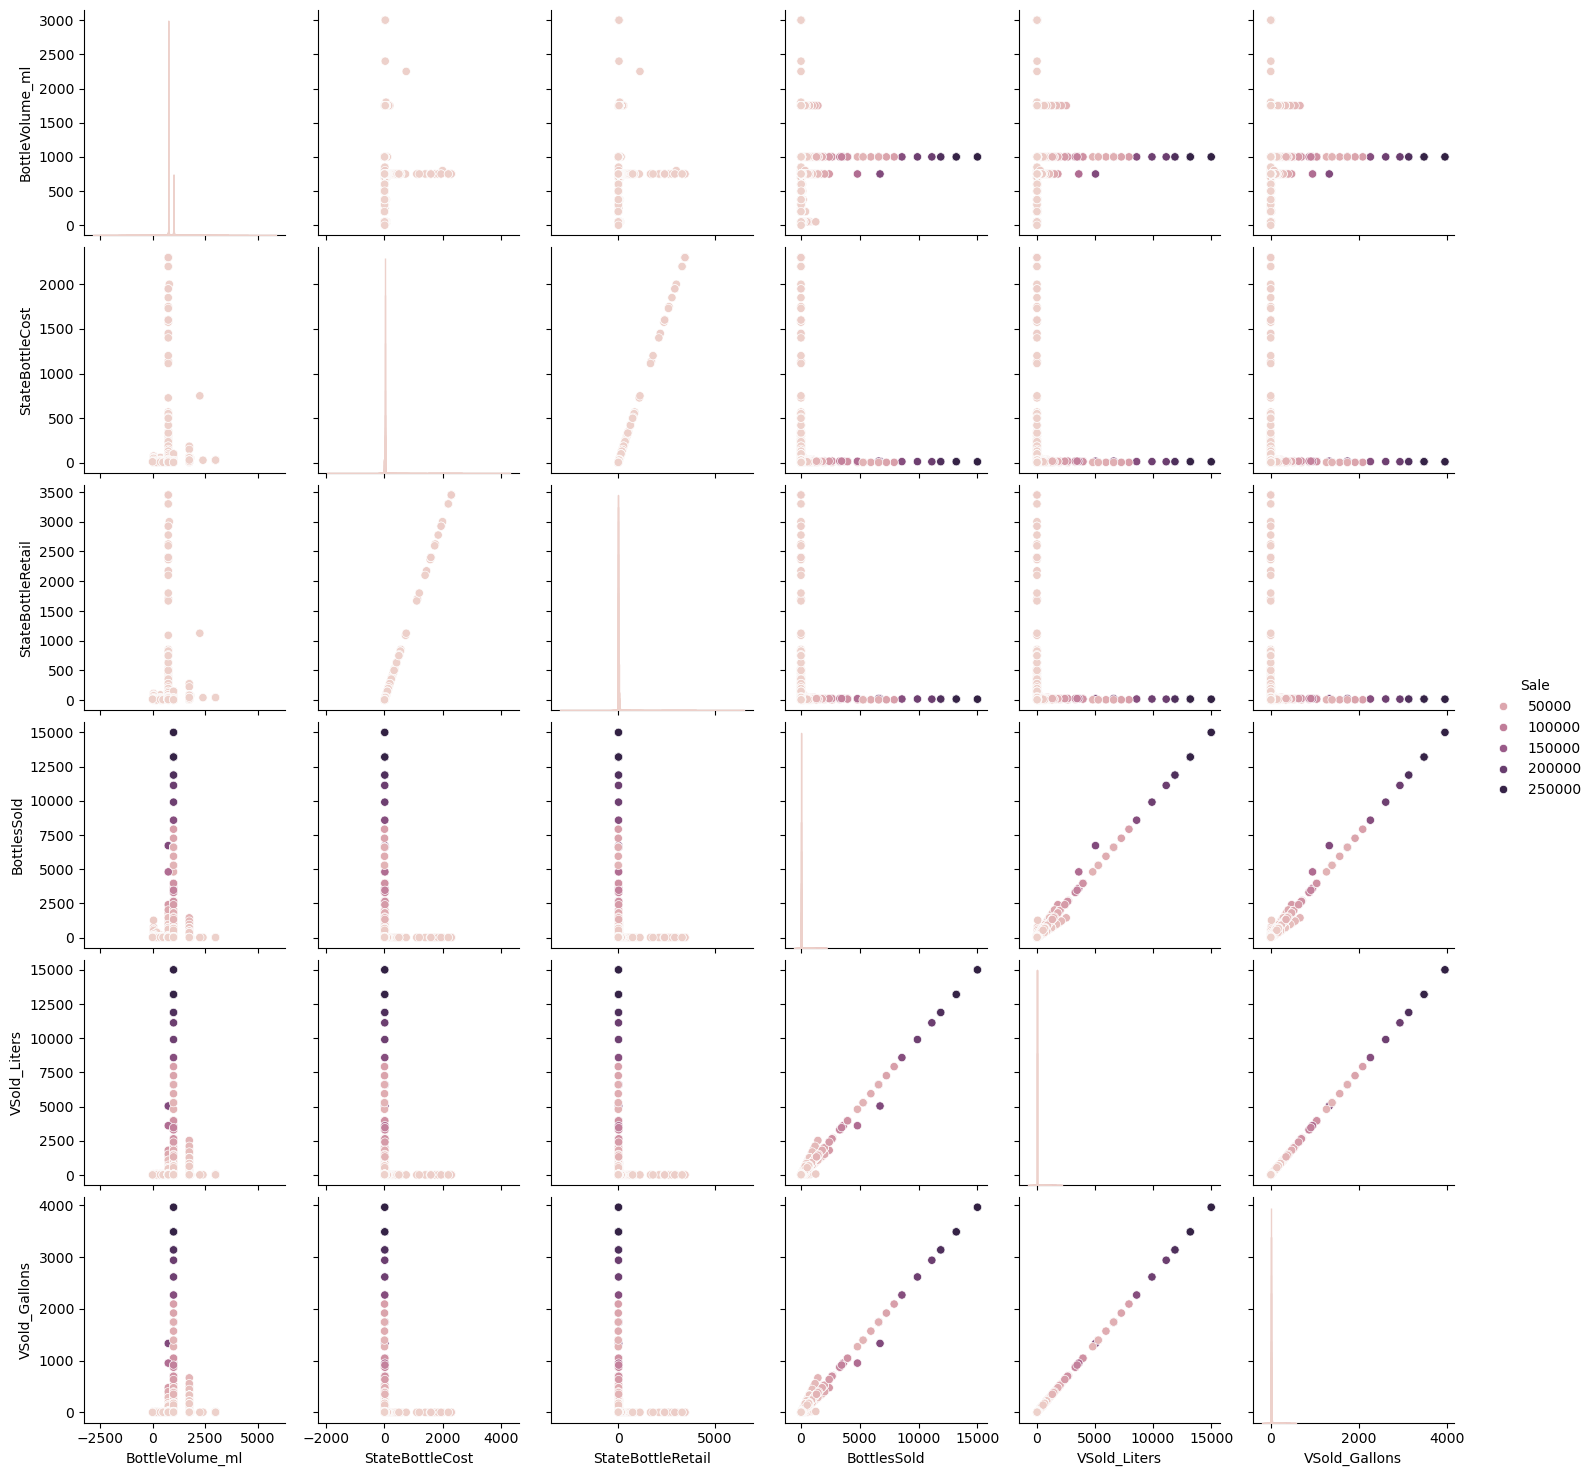

In [24]:
#Visualizando as relações entre as variáveis numéricas
sns.pairplot(df_HY_VEE[['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']], hue='Sale')

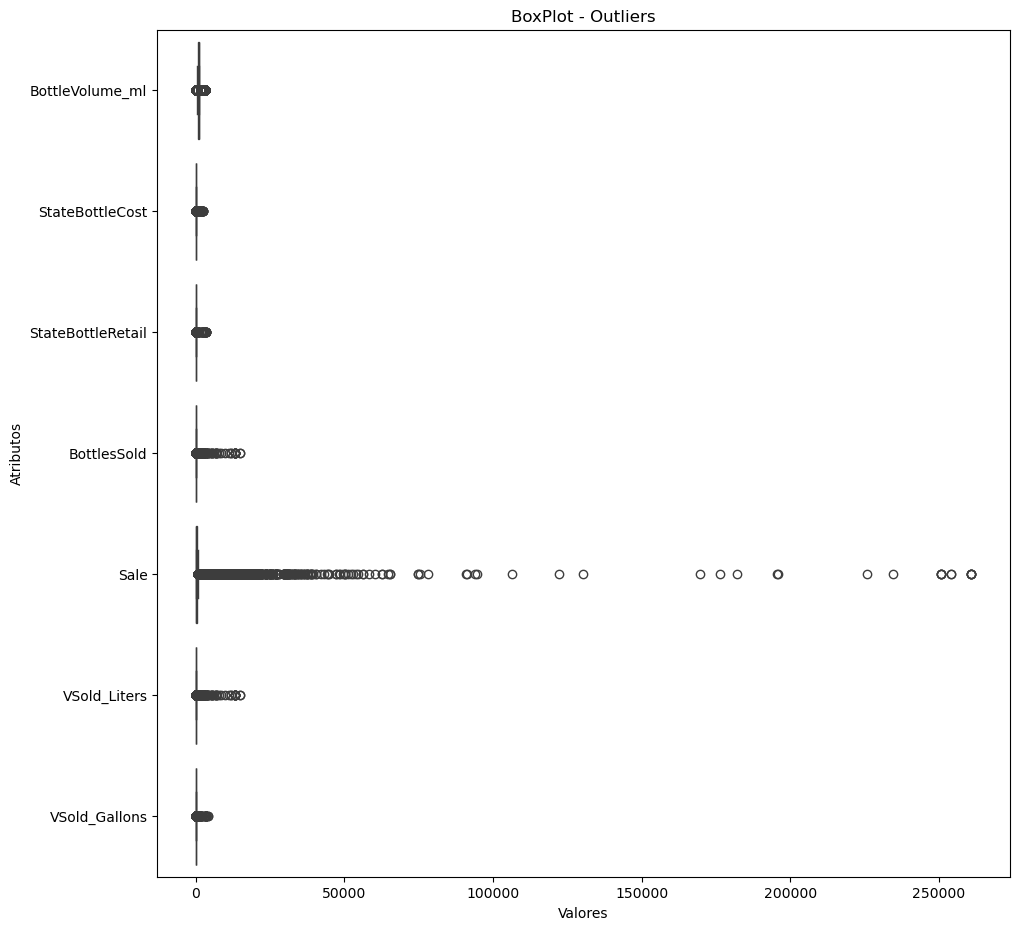

In [25]:
#Visualização dos outliers
plt.figure(figsize=(11,11))
plt.title("BoxPlot - Outliers")
plt.xlabel("Valores")
plt.ylabel("Atributos")
sns.boxplot(df_HY_VEE[['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']], orient='h')
plt.show()

In [24]:
#Remoção dos outliers
df_HY_VEE_no_outliers = df_HY_VEE.copy()
df_HY_VEE_full = df_HY_VEE.copy()

for column in ['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 
               'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']:
    Q1 = df_HY_VEE_no_outliers[column].quantile(0.25)
    Q3 = df_HY_VEE_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + (1.5 * IQR)
    limite_inferior = Q1 - (1.5 * IQR)

    df_HY_VEE_no_outliers = df_HY_VEE_no_outliers[(df_HY_VEE_no_outliers[column] >= limite_inferior) & (df_HY_VEE_no_outliers[column] <= limite_superior)]

df_HY_VEE_no_outliers

,CategoryName,VendorName,ItemDescription,Pack,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,Sale,VSold_Liters,VSold_Gallons
0,52,20,1729,12,750,17.97,26.96,12,323.52,9.0,2.38
2,12,118,901,12,1000,7.11,10.67,12,128.04,12.0,3.17
4,63,146,1166,12,1000,7.62,11.43,1,11.43,1.0,0.26
5,86,235,22,12,750,14.50,21.74,12,260.88,9.0,2.38
7,38,20,312,12,750,8.26,12.39,12,148.68,9.0,2.38
...,...,...,...,...,...,...,...,...,...,...,...
249555,51,75,925,12,1000,22.75,34.13,12,409.56,12.0,3.17
249559,52,66,3872,12,750,8.25,12.38,12,148.56,9.0,2.38
249561,86,146,2061,12,750,13.12,19.68,12,236.16,9.0,2.38
249564,60,146,1192,12,750,6.30,9.45,12,113.40,9.0,2.38


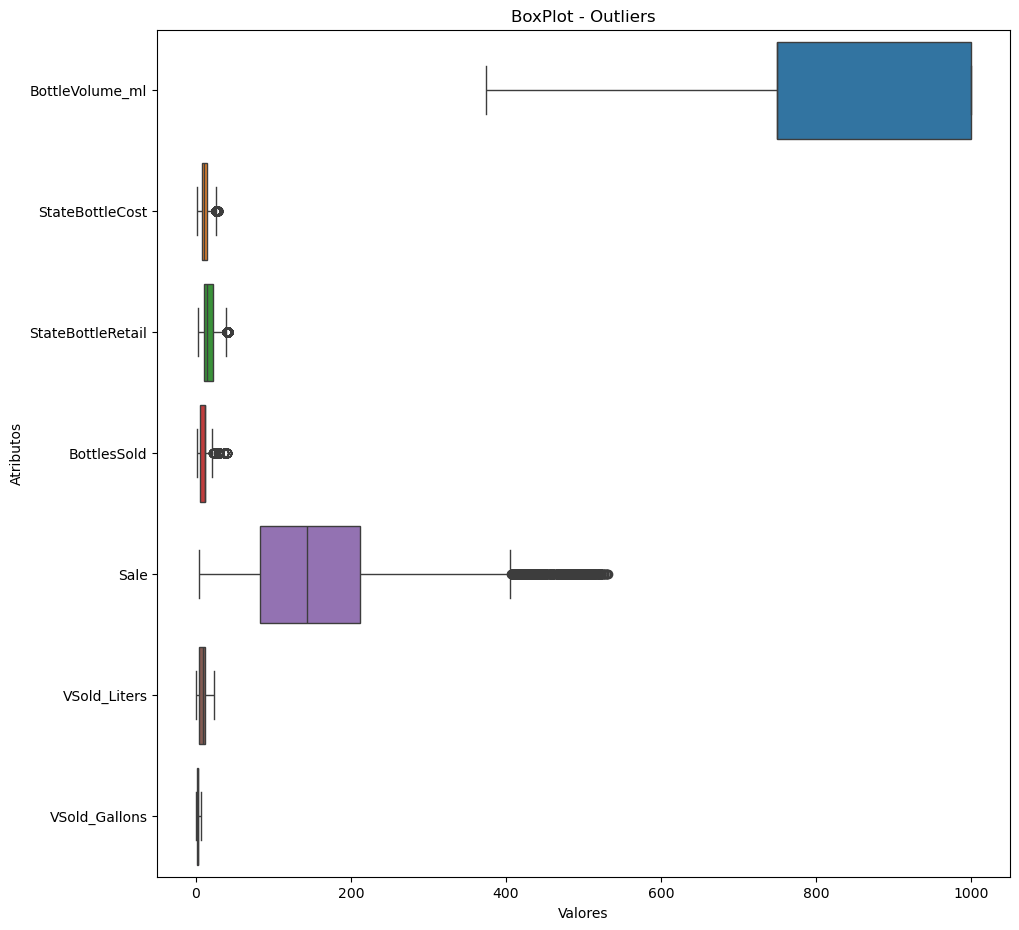

In [27]:
#Visualização dos outliers
plt.figure(figsize=(11,11))
plt.title("BoxPlot - Outliers")
plt.xlabel("Valores")
plt.ylabel("Atributos")
sns.boxplot(df_HY_VEE_no_outliers[['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']], orient='h')
plt.show()

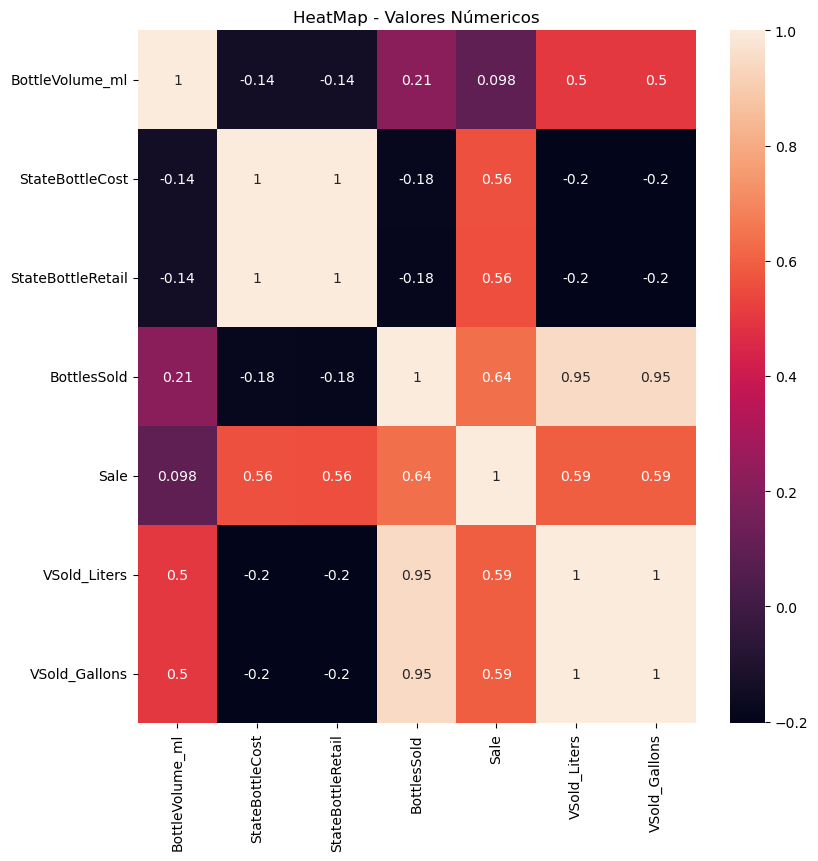

In [28]:
#Realizando o Heatmap para observar a correlação entre os atributos
plt.figure(figsize=(9,9))
plt.title("HeatMap - Valores Númericos")
sns.heatmap(df_HY_VEE_no_outliers[['BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail', 'BottlesSold', 'Sale', 'VSold_Liters', 'VSold_Gallons']].corr(), annot=True)
plt.show()

# Aplicação de modelos

Após realizar o pré-processamento da base, será aplicado os dados nos modelos de aprendizado de máquina.

## Regressão Linear

Abaixo encontra-se o aprendizado por regressão linear, com e sem outliers. 

### Sem Outliers

In [47]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_rl = df_HY_VEE_no_outliers['Sale']
x_rl = df_HY_VEE_no_outliers.drop(columns=['Sale', 'BottleVolume_ml'])

padronizacao = StandardScaler()
x_rl = padronizacao.fit_transform(x_rl)

ln = LinearRegression()

mse_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  
mae_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='r2')

print(f"Erro Quadrático Médio (MSE): {-np.mean(mse_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(mae_scores)}")
print(f"Coeficiente de Determinação (R²): {np.mean(r2_scores)}")
print(f"\nTempo de execução:")

Erro Quadrático Médio (MSE): 1338.7730139268465
Root Mean Squared Error (RMSE): 36.446182199846774
Erro Absoluto Médio (MAE): 25.002514812067233
Coeficiente de Determinação (R²): 0.8814930378807441

Tempo de execução:
CPU times: total: 6.28 s
Wall time: 3.57 s


### Com Outliers

In [49]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

y_rl = df_HY_VEE_full['Sale']
x_rl = df_HY_VEE_full.drop(columns=['Sale', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail'])

padronizacao = StandardScaler()
x_rl = padronizacao.fit_transform(x_rl)

ln = LinearRegression()

mse_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  
mae_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(ln, x_rl, y_rl, cv=10, scoring='r2')

print(f"Erro Quadrático Médio (MSE): {-np.mean(mse_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(mae_scores)}")
print(f"Coeficiente de Determinação (R²): {np.mean(r2_scores)}")
print(f"\nTempo de execução:")

Erro Quadrático Médio (MSE): 1095656.4709456793
Root Mean Squared Error (RMSE): 1034.4557569252543
Erro Absoluto Médio (MAE): 280.7705513571385
Coeficiente de Determinação (R²): 0.8171145856518232

Tempo de execução:
CPU times: total: 7.42 s
Wall time: 4.12 s


## SVR (Support Vector Regression)

Será aplicado o modelo de regressão SVR.

## Árvore de Decisão 

Abaixo segue os passos da Árvore de Decisão.

### Sem Outliers

In [53]:
%%time

from sklearn.tree import DecisionTreeRegressor

y_dt = df_HY_VEE_no_outliers['Sale']
x_dt = df_HY_VEE_no_outliers.drop(columns=['Sale', 'BottleVolume_ml'])

padronizacao =  StandardScaler()
x_dt = padronizacao.fit_transform(x_dt)

arvore_decisao = DecisionTreeRegressor(criterion='squared_error')

mse_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  
mae_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='r2')

print(f"Erro Quadrático Médio (MSE): {-np.mean(mse_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(mae_scores)}")
print(f"Coeficiente de Determinação (R²): {np.mean(r2_scores)}")
print(f"\nTempo de execução:")

Erro Quadrático Médio (MSE): 51.84969463221046
Root Mean Squared Error (RMSE): 6.255387541382655
Erro Absoluto Médio (MAE): 0.6940914025250832
Coeficiente de Determinação (R²): 0.9955779887500207

Tempo de execução:
CPU times: total: 21.5 s
Wall time: 22.2 s


### Com Outliers

In [56]:
%%time

y_dt = df_HY_VEE_full['Sale']
x_dt = df_HY_VEE_full.drop(columns=['Sale', 'BottleVolume_ml', 'StateBottleCost', 'StateBottleRetail'])

padronizacao =  StandardScaler()
x_dt = padronizacao.fit_transform(x_dt)

arvore_decisao = DecisionTreeRegressor(criterion='squared_error')

mse_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  
mae_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(arvore_decisao, x_dt, y_dt, cv=10, scoring='r2')

print(f"Erro Quadrático Médio (MSE): {-np.mean(mse_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(mae_scores)}")
print(f"Coeficiente de Determinação (R²): {np.mean(r2_scores)}")
print(f"\nTempo de execução:")

Erro Quadrático Médio (MSE): 247597.694586012
Root Mean Squared Error (RMSE): 456.0290570128832
Erro Absoluto Médio (MAE): 27.492508629495184
Coeficiente de Determinação (R²): 0.9697175077218919

Tempo de execução:
CPU times: total: 31.7 s
Wall time: 31.8 s


## Floresta Aleatória

Abaixo segue o aprendizado por floresta aleatória. 

### Sem Outliers

In [61]:
%%time

from sklearn.ensemble import RandomForestRegressor

y_rf = df_HY_VEE_no_outliers['Sale']
x_rf = df_HY_VEE_no_outliers.drop(columns=['Sale', 'BottleVolume_ml'])

padronizacao = StandardScaler()
x_rf = padronizacao.fit_transform(x_rf)

floresta_aleatoria = RandomForestRegressor(n_estimators=100)

scoring = {
    'mse': 'neg_mean_squared_error',
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

results = cross_validate(floresta_aleatoria, x_rf, y_rf, cv=10, scoring=scoring)

print(f"Erro Quadrático Médio (MSE): {-np.mean(results['test_mse'])}")
print(f"Root Mean Squared Error (RMSE): {np.mean(results['test_rmse'])}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(results['test_mae'])}")
print(f"Coeficiente de Determinação (R²): {np.mean(results['test_r2'])}")
print(f"\nTempo de execução: ")

Erro Quadrático Médio (MSE): 40.30146291645159
Root Mean Squared Error (RMSE): 5.121523581038379
Erro Absoluto Médio (MAE): 0.6919211094951916
Coeficiente de Determinação (R²): 0.9964809723858401

Tempo de execução: 
CPU times: total: 7min 42s
Wall time: 7min 44s


### Com Outliers

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

y_rf = df_HY_VEE_full['Sale']
x_rf = df_HY_VEE_full.drop(columns=['Sale', 'BottleVolume_ml'])

padronizacao = StandardScaler()
x_rf = padronizacao.fit_transform(x_rf)

floresta_aleatoria = RandomForestRegressor(n_estimators=100)

scoring = {
    'mse': 'neg_mean_squared_error',
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

results = cross_validate(floresta_aleatoria, x_rf, y_rf, cv=10, scoring=scoring)

print(f"Erro Quadrático Médio (MSE): {-np.mean(results['test_mse'])}")
print(f"Root Mean Squared Error (RMSE): {np.mean(results['test_rmse'])}")
print(f"Erro Absoluto Médio (MAE): {-np.mean(results['test_mae'])}")
print(f"Coeficiente de Determinação (R²): {np.mean(results['test_r2'])}")
print(f"\nTempo de execução: ")